<a href="https://colab.research.google.com/github/alfafimel/IPWK8-CORE/blob/main/IPWK8_CORE_DECISION_TREES_%26_SVM_ELIZABETH_JOSEPHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINING THE QUESTION**

## **a) Specifying the Question**
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## **b) Defining the metrics for success**

Building of a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## **c) Understanding the context**

Knowing the determinant symptoms of hypothroid

## **d) Recording the Experimental Design**

1.   Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis.
> - For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
7. Provide a recommendation based on your analysis. 
> C- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 
8. Challenge your solution by providing insights on how you can make improvements in model improvement.

## **e) Relevance of the data**

The data used for this project is necessary for building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

[http://bit.ly/hypothyroid_data].

# **DATA ANALYSIS**

### **Data Checking**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading datasets
df = pd.read_csv('http://bit.ly/hypothyroid_data')

In [3]:
# previewing the dataset
df.shape

(3163, 26)

In [4]:
# previewing the top of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# previewing the tail of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# printing the the number of unique values of the columns
print(df.nunique())

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64


In [7]:
# previewing the columns of the datasets
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
# replacing values 
df = df.replace({'?' : np.nan})
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,NaN


In [9]:
# replacing values and variables
df = df.replace({'f' : 0, 't' : 1})
df = df.replace({'n' : 0, 'y' : 1})

In [10]:
# using apply method 
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]] =df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]].apply(pd.to_numeric) 
print(df.dtypes) 

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object


In [11]:
df.sample(8)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
1789,negative,48.0,M,0,0,0,0,0,0,0,0,0,0,0,1,2.20,1,2.1,1,55.0,1,0.85,1,65.0,0,NaN
423,negative,18.0,M,1,0,0,0,1,0,0,0,0,0,0,1,2.50,1,2.7,1,131.0,1,0.89,1,149.0,0,NaN
2358,negative,34.0,F,0,0,0,0,0,1,1,0,0,0,0,1,0.04,1,2.9,1,144.0,1,1.58,1,91.0,0,NaN
2245,negative,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,2.20,1,1.5,1,97.0,1,1.02,1,95.0,0,NaN
1116,negative,71.0,F,0,0,0,0,0,0,0,0,0,0,0,1,2.60,1,1.0,1,87.0,1,0.89,1,97.0,0,NaN
2108,negative,64.0,F,0,0,0,0,0,0,0,0,0,0,0,1,0.90,1,2.5,1,123.0,1,1.16,1,107.0,0,NaN
3089,negative,68.0,F,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,1,87.0,1,0.85,1,102.0,0,NaN
863,negative,65.0,M,0,0,0,0,0,0,0,0,0,0,0,1,1.20,1,1.2,1,123.0,1,0.92,1,134.0,0,NaN


### **Note:**

In [12]:
## df.dropna()

##droping null values does away with a good section of the dataset leaving a dataset that is dysfunctional and insignificant.
# therefoore the null values in this dataset were not dropped

In [13]:
# previewing the various datatypes for every column
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

### **Data Cleaning**

In [14]:
# dropping unnecessary columns
df1 = df.drop(['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'], axis = 1)
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [15]:
# checking count of null values
df1.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
dtype: int64

In [16]:
# checking the datatypes
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

In [17]:
# filling the null values with zeros
df1.fillna(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,0,0,0,0,0,0,0,0,0,0,0
3159,negative,29.0,F,0,0,0,0,0,0,0,0,0,0,0
3160,negative,77.0,M,0,0,0,0,0,0,0,0,0,0,0
3161,negative,74.0,F,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# checking for duplicates
df1.duplicated().any()

True

In [19]:
# dropping duplicates
df1.drop_duplicates(inplace=True)

In [20]:
# checking count of duplicate entries
df1.duplicated().sum()

0

In [21]:
# previewing the dataset
df1.shape

(914, 14)

In [22]:
# previewing the columns
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [23]:
# describing the numerical features
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# checking for anomalies

q11 = df1['on_thyroxine'].quantile(.25)
q31 = df1['on_thyroxine'].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(df1['on_thyroxine'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

0.0 0.0


In [25]:
# previewing the columns
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [26]:
# previewing the datatypes
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


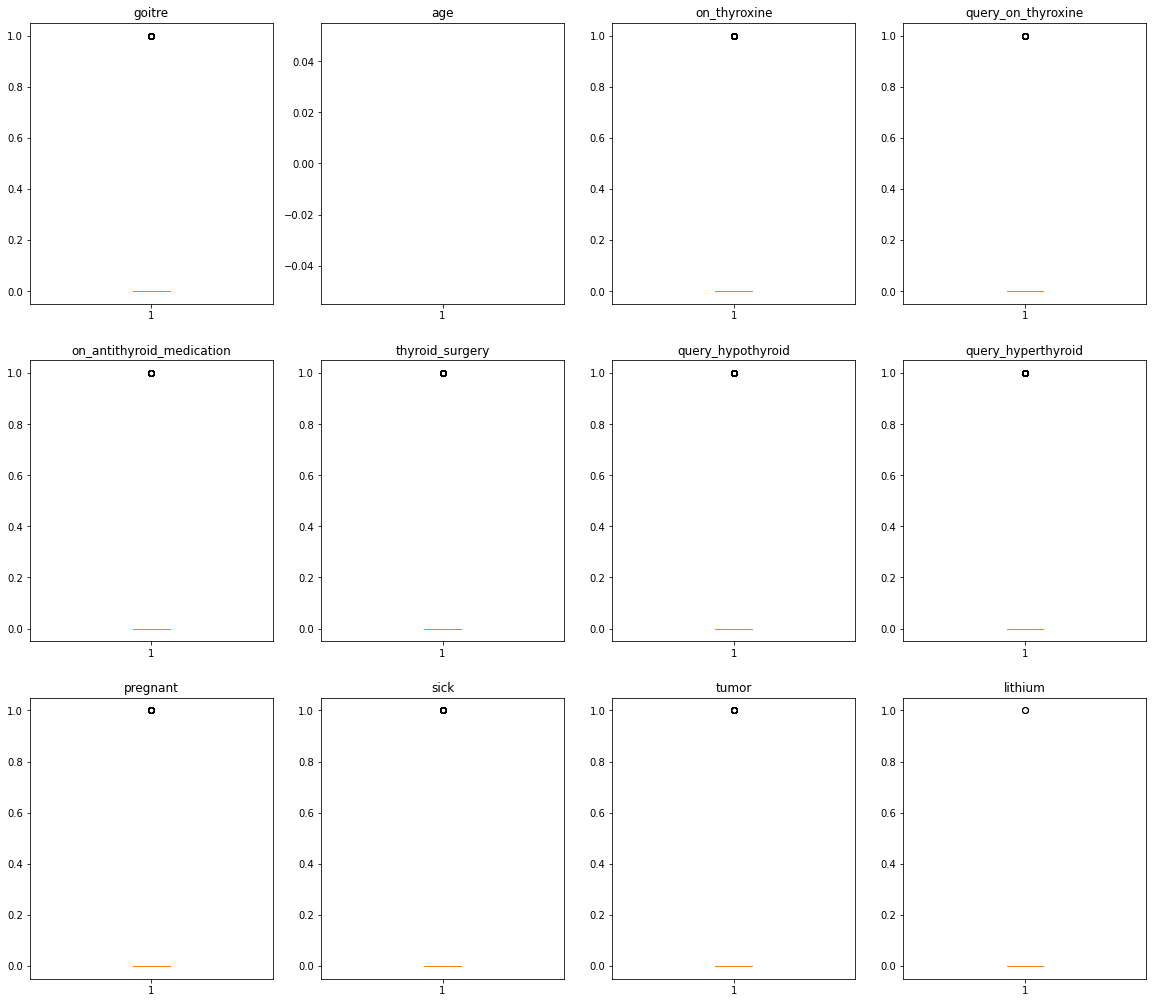

In [27]:
# checking for outliers
# saving the column names onto a dictionary
columns_dict = {'goitre': 1, 'age': 2, 'on_thyroxine': 3, 'query_on_thyroxine': 4, 'on_antithyroid_medication': 5, 'thyroid_surgery': 6,
       'query_hypothyroid': 7, 'query_hyperthyroid': 8, 'pregnant': 9, 'sick': 10, 'tumor': 11, 'lithium': 12}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df1[variable])
  plt.title(variable)

plt.show()

In [28]:
# dealing with the outliers using quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
dfx = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(dfx.shape)

# Printing the shape of our old dataset
print(df1.shape)

(226, 14)
(914, 14)




> Since removing the outliers has a graeat effect on the data, for the exploratory analysis, i will be using the initial dataset, the df1



# **EXPLORATORY DATA ANALYSIS**

## **a) Univariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

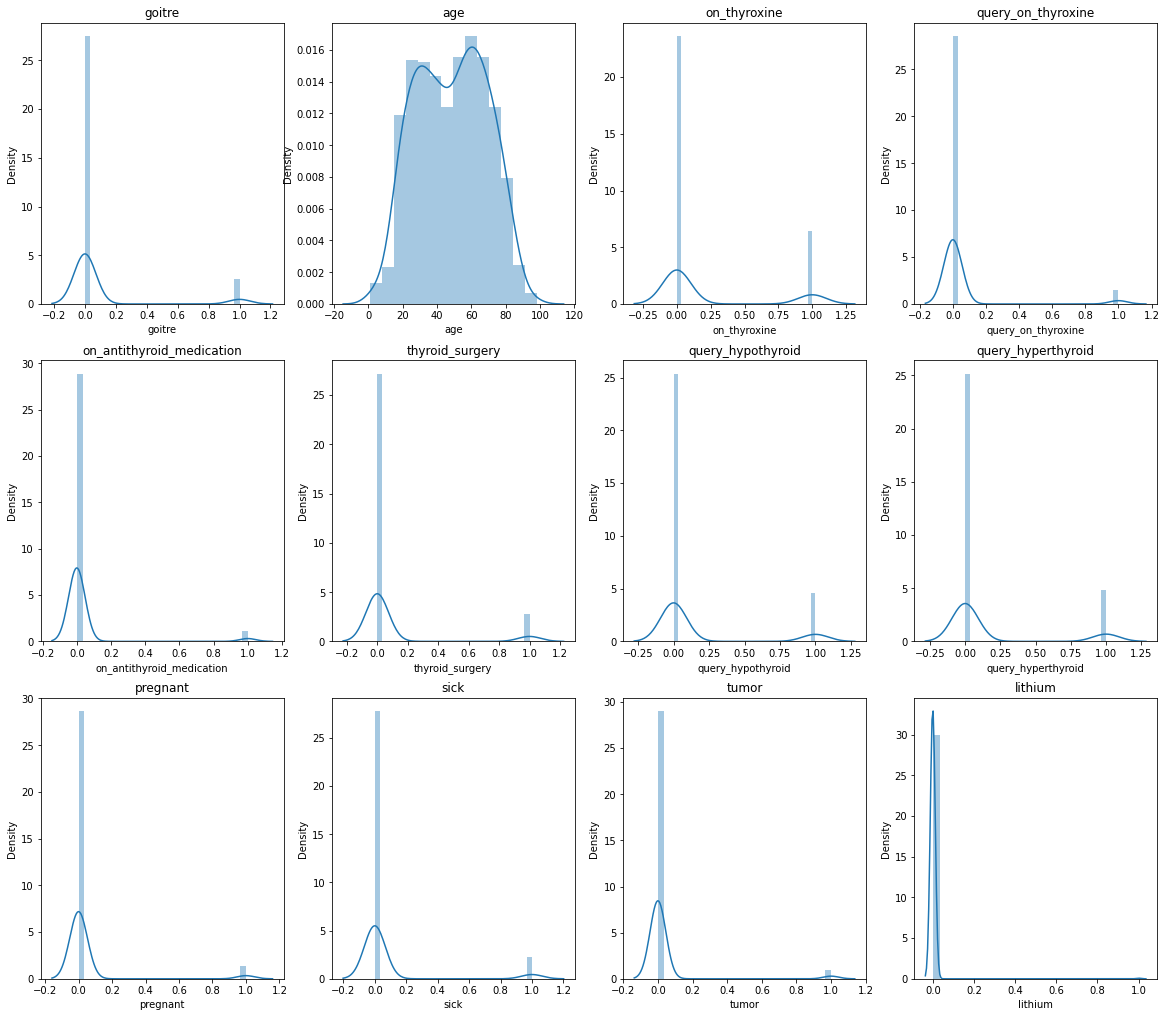

In [29]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [30]:
# describing the statistical features of the data
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **b) Bivariate Analysis**

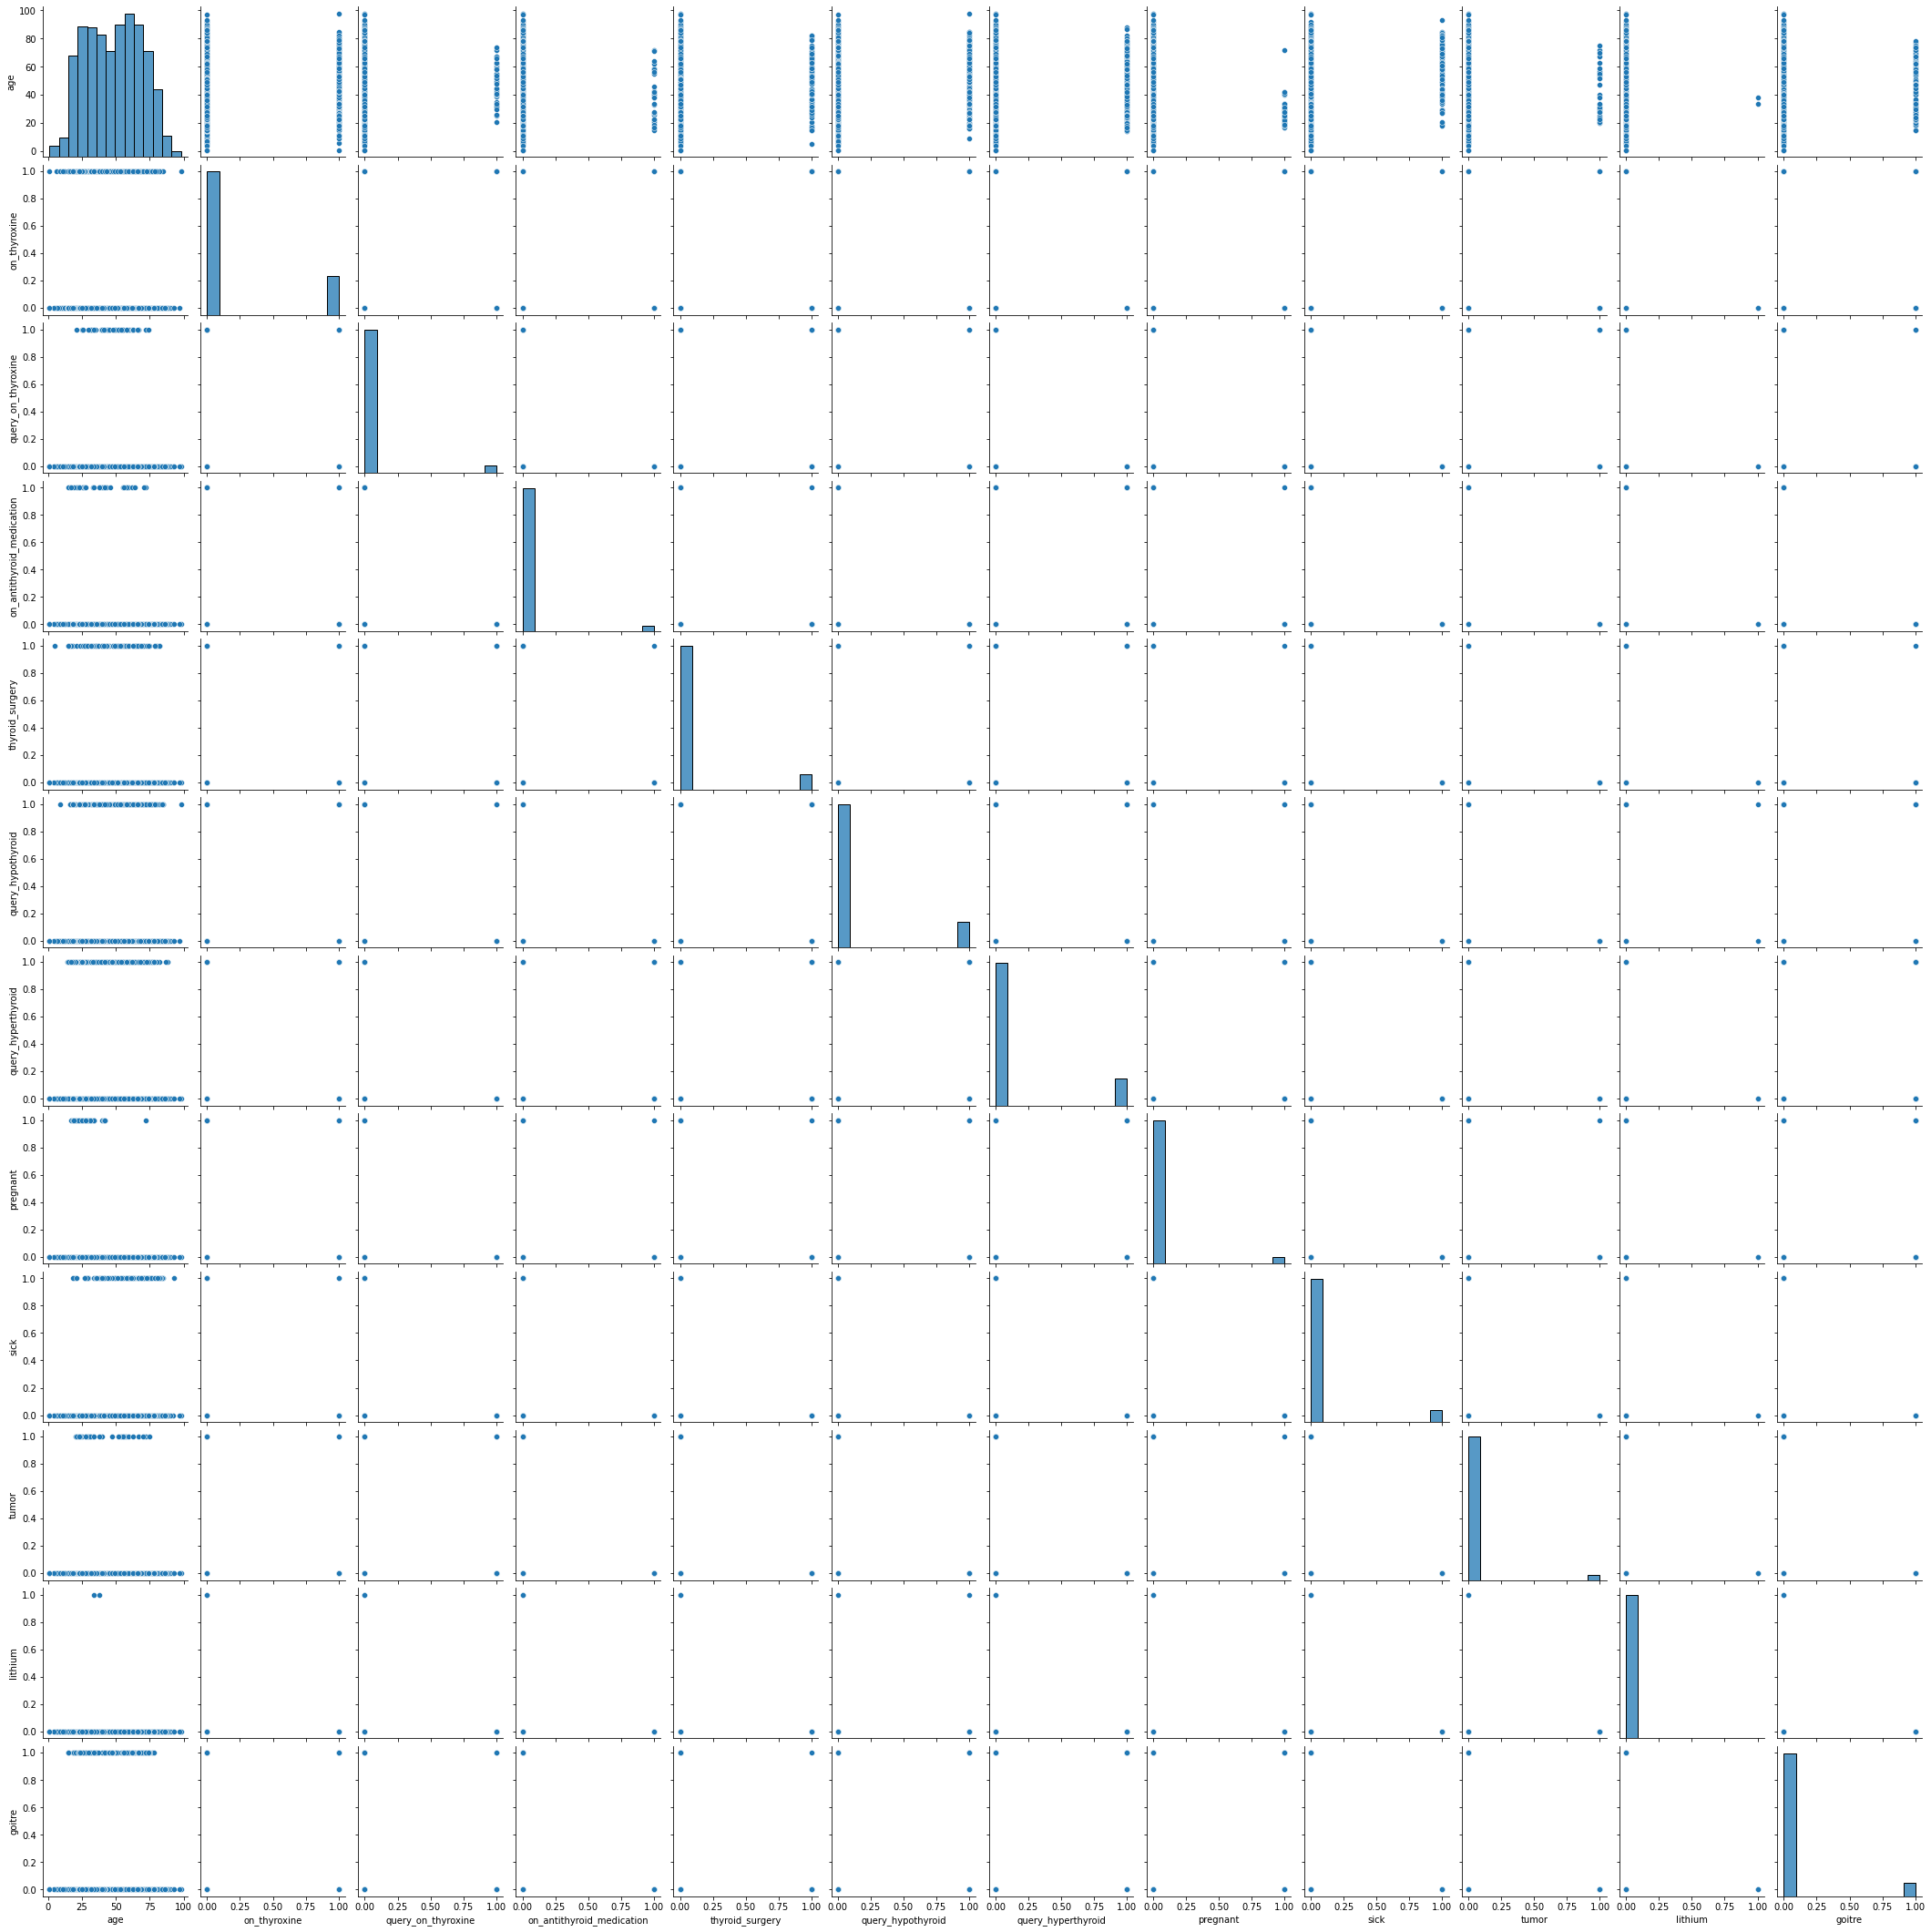

In [31]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df1)
plt.show()

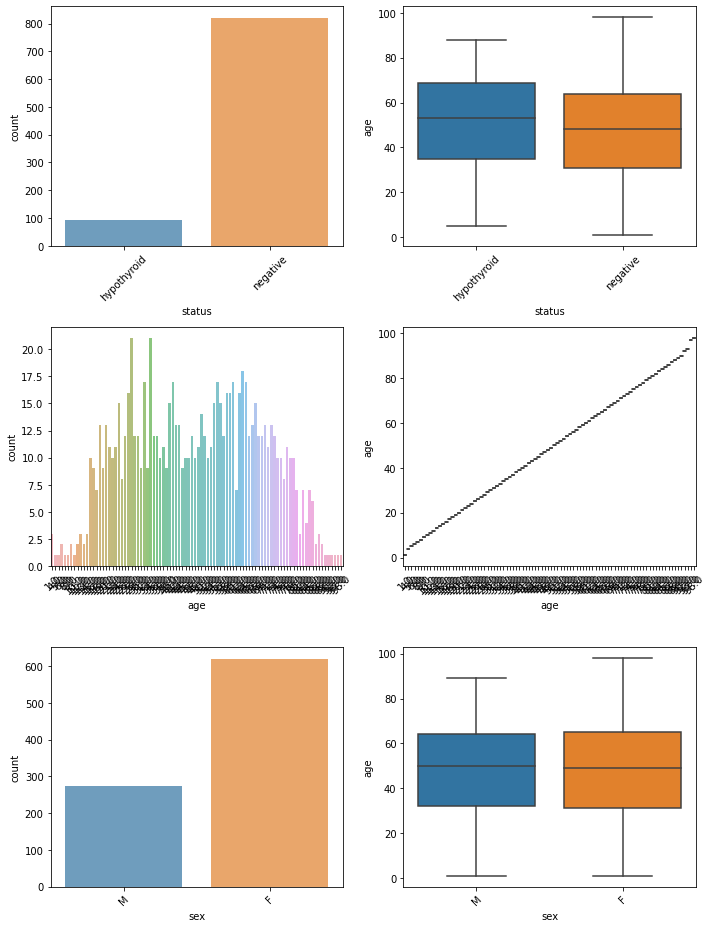

In [32]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the age is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df1.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df1.columns[c], alpha=0.7, data=df1, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df1, x=df1.columns[c], y='age', ax=ax)
        c = c + 1
fig.tight_layout()

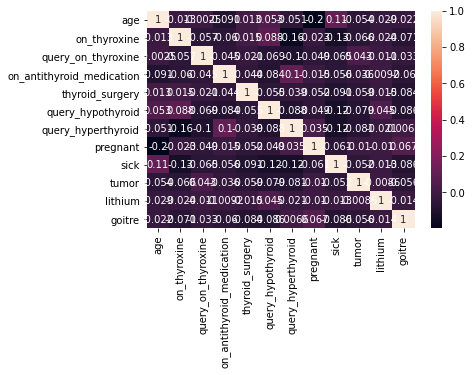

In [33]:
# plotting the correlation using a heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [34]:
# tabulating the correlation coefficients
corr = df1.corr()
corr

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
age,1.000000,-0.012807,-0.002483,-0.090608,0.012864,0.052702,-0.050616,-0.199151,0.108849,-0.053991,-0.029005,-0.022302
on_thyroxine,-0.012807,1.000000,-0.056790,-0.060029,0.015112,0.088118,-0.162563,-0.022544,-0.127292,-0.065959,-0.024388,-0.071419
query_on_thyroxine,-0.002483,-0.056790,1.000000,-0.044730,-0.021376,-0.069189,-0.099622,-0.049315,-0.064516,0.043225,-0.010656,-0.032608
on_antithyroid_medication,-0.090608,-0.060029,-0.044730,1.000000,-0.043546,-0.083949,0.102787,-0.014668,-0.055727,-0.036210,-0.009205,-0.059618
thyroid_surgery,0.012864,0.015112,-0.021376,-0.043546,1.000000,-0.054644,-0.039084,-0.051738,-0.091370,-0.059370,-0.015092,-0.084258
query_hypothyroid,0.052702,0.088118,-0.069189,-0.083949,-0.054644,1.000000,-0.088034,-0.048656,-0.121085,-0.078678,0.044823,-0.085918
query_hyperthyroid,-0.050616,-0.162563,-0.099622,0.102787,-0.039084,-0.088034,1.000000,0.034615,-0.124117,-0.080648,-0.020501,0.006605
pregnant,-0.199151,-0.022544,-0.049315,-0.014668,-0.051738,-0.048656,0.034615,1.000000,-0.061440,-0.010257,-0.010149,0.067480
sick,0.108849,-0.127292,-0.064516,-0.055727,-0.091370,-0.121085,-0.124117,-0.061440,1.000000,-0.052228,-0.013277,-0.085991
tumor,-0.053991,-0.065959,0.043225,-0.036210,-0.059370,-0.078678,-0.080648,-0.010257,-0.052228,1.000000,-0.008627,-0.055875


## **c) Multivariate Analysis**

### **i) Factor Analysis**

In [35]:
# Performing adequacy tests
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 4.1645423146182944e-27. The test was statistically insignificant, 
# indicating that the observed correlation matrix is an identity matrix.

(316.3276219649843, 4.1645423146182944e-27)

### **minor adjustments:**

In [36]:
# filling null values with zeros
df2 = df1.fillna(0)
df2.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
dtype: bool

In [37]:
# previewing the datatypes
df2.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

In [38]:
# checking for null values
df2.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
dtype: int64

In [39]:
# dropping unnecessary columns
df2 = df2.drop(['status'], axis=1)
df3 = df2.drop(['sex'], axis=1)

In [40]:
# converting variables from float to int 
df3['age'] = df3['age'].astype(int)

In [41]:
# printing the shape and datatypes
print(df3.shape)
print(df3.dtypes)

(914, 12)
age                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
dtype: object


### **ii) Principal Component Analysis**

In [42]:
# preprocessing
X = df3.iloc[:, 0:11].values
y = df3.iloc[:, 11].values

In [43]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# applyting PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
# explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12684918, 0.11402903, 0.10723858, 0.09806844, 0.09432151,
       0.0902463 , 0.08838177, 0.08532877, 0.07441717, 0.06958401,
       0.05153524])

In [47]:
# using 1 principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [48]:
# training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [49]:
# performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

## the accuracy of this evaluation is less than 1

[[170   0]
 [ 13   0]]
Accuracy 0.9289617486338798


### **iii) Linear Discriminant Analysis**



> ***with the two reduction tecnhiques shown, I tried to use the LDA method too, though for this case, it was not essential hence the incomplete analysis.***



In [50]:
# preprocessing
X = df3.iloc[:, 0:11].values
y = df3.iloc[:, 11].values

In [51]:
# divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [54]:
# Training and Making Predictions
#from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestClassifier(max_depth=2, random_state=0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

In [55]:
# Evaluating the Performance
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# **IMPLEMENTING THE SOLUTION**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  



> ***Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.***





## **PART 1: DECISION TREES**

In [56]:
# Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

In [57]:
# previewing the columns in the dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

### **Using Random Forest**

In [58]:
# filling null values with zeros
df4 = df.fillna(0)
df4.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

In [59]:
# converting variables from float to int
m = df4.select_dtypes(np.number)
df4[m.columns]= m.round().astype('Int64')

In [60]:
# dropping unnecessary columns
df5 = df4.drop(['sex','on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], axis=1)
df5

,status,age,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72,30,1,15,1,10,0
1,hypothyroid,15,145,2,19,1,17,0
2,hypothyroid,24,0,0,4,1,0,0
3,hypothyroid,24,430,0,6,1,6,0
4,hypothyroid,77,7,1,57,1,44,0
...,...,...,...,...,...,...,...,...
3158,negative,58,6,2,86,1,95,0
3159,negative,29,1,2,99,1,98,0
3160,negative,77,1,1,71,1,104,0
3161,negative,74,1,0,65,0,137,0


In [61]:
# previewing the dataset
df5.columns

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

In [62]:
# importing the required libraries
from sklearn.model_selection import train_test_split

# the prediction model to be built will be used to determine whether or not 
# the patient's symptoms indicate that the patient has hypothyroid.
# for that we will use the status column as our Y
y = df5['status'].values

# test_features = [['age', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       # 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
test_features = df5.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df5[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2214, 7)
(2214,)
(949, 7)
(949,)


In [63]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 20, max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [64]:
# previewing the statistical features of the data
df5.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.036358,1.515650,100.281378,0.944040,106.386342,2.570977
std,25.235169,22.163221,1.218658,52.588161,0.353484,65.607437,10.204035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,76.000000,1.000000,85.000000,0.000000
50%,48.000000,0.000000,2.000000,100.000000,1.000000,105.000000,0.000000
75%,64.000000,2.000000,2.000000,124.000000,1.000000,126.000000,0.000000
max,98.000000,530.000000,10.000000,450.000000,2.000000,881.000000,122.000000


In [65]:
# Predicting based on the model trained
y_pred = forest.predict(X_test)

#comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#comparison_frame.describe()
#
# for this case, the ones with 'hypothroid' means that the symptoms indicate 
# that a person has hypothrois while the negatives idicate that the person doesnt have the disease

### **Using Gradient boosting**

In [66]:
# importing libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
# train with Gradient Boosting algorithm
# computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.980
Accuracy score (validation): 0.978

Learning rate:  0.1
Accuracy score (training): 0.989
Accuracy score (validation): 0.981

Learning rate:  0.25
Accuracy score (training): 0.993
Accuracy score (validation): 0.987

Learning rate:  0.5
Accuracy score (training): 0.894
Accuracy score (validation): 0.889

Learning rate:  0.75
Accuracy score (training): 0.994
Accuracy score (validation): 0.988

Learning rate:  1
Accuracy score (training): 0.887
Accuracy score (validation): 0.891



In [68]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20,learning_rate = 0.5,random_state = 7)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix for Gradient boosting:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report for Gradient Boosting")
print(classification_report(y_test, predictions))

Confusion Matrix for Gradient boosting:
[[ 31   8]
 [  9 901]]

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

 hypothyroid       0.78      0.79      0.78        39
    negative       0.99      0.99      0.99       910

    accuracy                           0.98       949
   macro avg       0.88      0.89      0.89       949
weighted avg       0.98      0.98      0.98       949



Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

## **PART 2: SUPPORT VECTOR MACHINES (SVM)**

In [69]:
# importing libraries
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [70]:
# previewing the dataset 
df5.dtypes

status    object
age        Int64
TSH        Int64
T3         Int64
TT4        Int64
T4U        Int64
FTI        Int64
TBG        Int64
dtype: object

In [71]:
# dropping unnecessary columns
df6 = df5.drop(['age'], axis=1)
df6.head()

,status,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,30,1,15,1,10,0
1,hypothyroid,145,2,19,1,17,0
2,hypothyroid,0,0,4,1,0,0
3,hypothyroid,430,0,6,1,6,0
4,hypothyroid,7,1,57,1,44,0


In [72]:
# declaring feature vector and target variables
X = df6.drop(['status'], axis=1)
y = df6['status']

In [73]:
# splitting data into separate training and test sets
from sklearn.model_selection import train_test_split
# training 80% of the dats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
# checking the shape of X_train and X_test
X_train.shape, X_test.shape

((2530, 6), (633, 6))

In [75]:
# feature scaling
#cols = X_train.column

#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])
# X_train.describe()
X_train

array([[-0.13410658,  0.38487128,  1.40568704,  0.1648068 ,  0.65096694,
        -0.2541657 ],
       [-0.22452354, -0.42589003,  0.09084372,  0.1648068 , -0.04566504,
        -0.2541657 ],
       [-0.22452354,  1.19563259,  0.22232805,  0.1648068 ,  0.4497177 ,
        -0.2541657 ],
       ...,
       [-0.04368962, -0.42589003,  0.59799757,  0.1648068 ,  0.38779486,
        -0.2541657 ],
       [-0.17931506, -1.23665135, -0.86711355, -2.67166402,  1.23923394,
        -0.2541657 ],
       [-0.13410658,  0.38487128, -0.15334147,  0.1648068 ,  0.17106491,
        -0.2541657 ]])

In [76]:
# running SVM with the default hyperparameters
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
#
# instantiate classifier with default hyperparameters
svc=SVC() 
# fitting classifier to training set
#
svc.fit(X_train,y_train)

# making predictions on test set
y_pred=svc.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9763


## **`Running SVM classifier with rbf Kernel`**

In [77]:
# the dataset has several outliers
# as such, the need to minimize them requires a higher value of C
# running SVM classifier with rbf kernel and C=100.0 we have:
#
svc=SVC(C=100.0) 

# fitting classifier to training set
svc.fit(X_train,y_train)

# making predictions on test set
y_pred=svc.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9842


In [78]:
# running SVM classifier with rbf kernel and C=1000.0 we have:
#
svc=SVC(C=1000.0) 

# fitting classifier to training set
svc.fit(X_train,y_train)

# making predictions on test set
y_pred=svc.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9842




## **`Running SVM classifier with Linear Kernel`**



In [79]:
# running SVM classifier with linear kernel and C=1.0 we have:
#
linear_svc=SVC(kernel='linear', C=1.0) 

# fitting classifier to training set
linear_svc.fit(X_train,y_train)

# making predictions on test set
y_pred_test=linear_svc.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9763


In [80]:
# running SVM classifier with linear kernel and C=100.0 we have:
#
linear_svc100=SVC(kernel='linear', C=100.0) 

# fitting classifier to training set
linear_svc100.fit(X_train, y_train)

# making predictions on test set
y_pred=linear_svc100.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9763


In [81]:
# running SVM classifier with linear kernel and C=1000.0 we have:
#
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fitting classifier to training set
linear_svc1000.fit(X_train, y_train)

# making predictions on test set
y_pred=linear_svc1000.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


In [82]:
# comparing the accuracy of both the train and test sets
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [83]:
# printing the accuracy of the training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9830


In [84]:
# checking for under and overfitting
# printing the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9830
Test set score: 0.9763


In [85]:
# comparing the model and null accuracies
# checking the class distribution in test set

y_test.value_counts()

negative       607
hypothyroid     26
Name: status, dtype: int64

In [86]:
# checking the null accuracy score

null_accuracy = (3306/(3306+274))
##
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


## **`Running SVM classifier with Polynomial Kernel`**

In [87]:
# running SVM classifier with  with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fitting classifier to training set
poly_svc.fit(X_train,y_train)

# making predictions on test set
y_pred=poly_svc.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9763


In [88]:
# running SVM classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fitting classifier to training set
poly_svc100.fit(X_train, y_train)

# making predictions on test set
y_pred=poly_svc100.predict(X_test)

# computing and printing the accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9763


In [89]:
# Printing the Confusion Matrix and slicing it into four pieces
##
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
###
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 17   9]
 [  6 601]]

True Positives(TP) =  17

True Negatives(TN) =  601

False Positives(FP) =  9

False Negatives(FN) =  6



True Positives(TP) =  17

True Negatives(TN) =  601

False Positives(FP) =  9

False Negatives(FN) =  6
The confusion matrix shows 17 + 601 = 618 correct predictions and 9 + 6 = 15 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 17
True Negatives (Actual Negative:0 and Predict Negative:0) - 601
False Positives (Actual Negative:0 but Predict Positive:1) - 9 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 6 (Type II error)

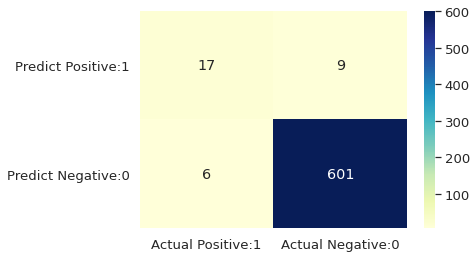

In [90]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [91]:
# classification metrices
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

 hypothyroid       0.74      0.65      0.69        26
    negative       0.99      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.86      0.82      0.84       633
weighted avg       0.98      0.98      0.98       633



In [92]:
# classification accuracies
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [93]:
# printing the classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9763


In [94]:
# printing the classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0237


In [95]:
# printing the precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6538


In [96]:
# printing recall

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7391


In [97]:
# specificity

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9852


In [98]:
# true positive rate

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7391


In [99]:
# false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0148


## **`Hyperparameter Optimization using GridSearch CV`**

In [100]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC
# runing SVM classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]
#
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
#
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=Tru

In [101]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9862


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


from the analysis and predictions above, the parameters that did give the best results were Parameters that give the best results : 

 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [102]:
# calculating GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9842
